In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('clean_tweets.csv')

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
df.dropna(inplace=True)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1596714 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
x = df['text'] #define all other columns except the target variable
y = df['sentiment'] #define the target variable

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size = 0.02, random_state = 42)

x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, 
                                                              test_size = 0.5, random_state = 42)

In [12]:
null_accuracy = 0
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test==0])/len(x_test)>0.5:
        null_accuracy = len(x_test[y_test==0])/len(x_test)
    else:
        null_accuracy = 1 - len(x_test[y_test==0])/len(x_test)
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("Null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("Accuracy: {0:.2f}%".format(accuracy*100))
    if accuracy>null_accuracy:
        print("Model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy==null_accuracy:
        print("Model has the same accuracy as null accuracy")
    else:
        print("Model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("Train and test time: {0:.2f}s".format(train_test_time))
    print("-"*50)
    return accuracy, train_test_time

In [13]:
tfidf = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000, 100001, 10000)

In [14]:
def nfeature_accuracy_checker(vectorizer = tfidf, n_features = n_features, stop_words = None, 
                              ngram_range = (1,1), classifier = lr):
    result = []
    print(classifier, "\n")
    for n in n_features:
        vectorizer.set_params(stop_words = stop_words, max_features = n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', classifier)])
        print("Validation result for {0} features".format(n))
        nfeature_accuracy, ttime = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n, nfeature_accuracy, ttime))    
    return result

In [15]:
%%time
print("RESULT FOR UNIGRAM\n")
feature_result_ug_t = nfeature_accuracy_checker()

RESULT FOR UNIGRAM

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Validation result for 10000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 79.58%
Model is 29.39% more accurate than null accuracy
Train and test time: 69.93s
--------------------------------------------------
Validation result for 20000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 79.86%
Model is 29.68% more accurate than null accuracy
Train and test time: 69.15s
--------------------------------------------------
Validation result for 30000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 79.90%
Model is 29.72% more accurate than null accuracy
Train and test time: 82.66s
--------------------------------------------------
Validation result for 40000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 79.99%
Model is 29.81% more accurate than null accuracy
Train and test time: 86.65s
--------------------------------------------------
Validation result for 50000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.05%
Model is 29.86% more accurate than null accuracy
Train and test time: 75.39s
--------------------------------------------------
Validation result for 60000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.03%
Model is 29.85% more accurate than null accuracy
Train and test time: 77.78s
--------------------------------------------------
Validation result for 70000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.06%
Model is 29.87% more accurate than null accuracy
Train and test time: 88.76s
--------------------------------------------------
Validation result for 80000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.04%
Model is 29.86% more accurate than null accuracy
Train and test time: 78.78s
--------------------------------------------------
Validation result for 90000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.11%
Model is 29.92% more accurate than null accuracy
Train and test time: 81.18s
--------------------------------------------------
Validation result for 100000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.08%
Model is 29.89% more accurate than null accuracy
Train and test time: 93.07s
--------------------------------------------------
Wall time: 13min 23s


In [17]:
%%time
print("RESULT FOR BIGRAM\n")
feature_result_bg_t = nfeature_accuracy_checker(ngram_range=(1,2))

RESULT FOR BIGRAM

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Validation result for 10000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.53%
Model is 30.34% more accurate than null accuracy
Train and test time: 121.49s
--------------------------------------------------
Validation result for 20000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 81.56%
Model is 31.37% more accurate than null accuracy
Train and test time: 131.22s
--------------------------------------------------
Validation result for 30000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 81.73%
Model is 31.55% more accurate than null accuracy
Train and test time: 135.02s
--------------------------------------------------
Validation result for 40000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.02%
Model is 31.83% more accurate than null accuracy
Train and test time: 140.91s
--------------------------------------------------
Validation result for 50000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.08%
Model is 31.90% more accurate than null accuracy
Train and test time: 141.86s
--------------------------------------------------
Validation result for 60000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.26%
Model is 32.07% more accurate than null accuracy
Train and test time: 143.96s
--------------------------------------------------
Validation result for 70000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.34%
Model is 32.15% more accurate than null accuracy
Train and test time: 143.70s
--------------------------------------------------
Validation result for 80000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.29%
Model is 32.10% more accurate than null accuracy
Train and test time: 149.83s
--------------------------------------------------
Validation result for 90000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.43%
Model is 32.24% more accurate than null accuracy
Train and test time: 146.81s
--------------------------------------------------
Validation result for 100000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.35%
Model is 32.17% more accurate than null accuracy
Train and test time: 151.94s
--------------------------------------------------
Wall time: 23min 26s


In [18]:
%%time
print("RESULT FOR TRIGRAM\n")
feature_result_tg_t = nfeature_accuracy_checker(ngram_range=(1,3))

RESULT FOR TRIGRAM

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Validation result for 10000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 80.42%
Model is 30.24% more accurate than null accuracy
Train and test time: 238.22s
--------------------------------------------------
Validation result for 20000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 81.40%
Model is 31.21% more accurate than null accuracy
Train and test time: 244.14s
--------------------------------------------------
Validation result for 30000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 81.66%
Model is 31.47% more accurate than null accuracy
Train and test time: 238.21s
--------------------------------------------------
Validation result for 40000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 81.92%
Model is 31.73% more accurate than null accuracy
Train and test time: 250.77s
--------------------------------------------------
Validation result for 50000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.29%
Model is 32.11% more accurate than null accuracy
Train and test time: 258.09s
--------------------------------------------------
Validation result for 60000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.23%
Model is 32.05% more accurate than null accuracy
Train and test time: 257.76s
--------------------------------------------------
Validation result for 70000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.15%
Model is 31.97% more accurate than null accuracy
Train and test time: 256.95s
--------------------------------------------------
Validation result for 80000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.36%
Model is 32.18% more accurate than null accuracy
Train and test time: 247.93s
--------------------------------------------------
Validation result for 90000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.35%
Model is 32.17% more accurate than null accuracy
Train and test time: 261.50s
--------------------------------------------------
Validation result for 100000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.36%
Model is 32.17% more accurate than null accuracy
Train and test time: 261.43s
--------------------------------------------------
Wall time: 41min 55s


In [19]:
feature_plot_ug_t = pd.DataFrame(feature_result_ug_t, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_bg_t = pd.DataFrame(feature_result_bg_t, columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_tg_t = pd.DataFrame(feature_result_tg_t, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])

In [20]:
feature_plot_ug_c = pd.read_csv('ug-with-stopwords.csv', index_col=[0])
feature_plot_bg_c = pd.read_csv('bg.csv', index_col=[0])
feature_plot_tg_c = pd.read_csv('tg.csv', index_col=[0])

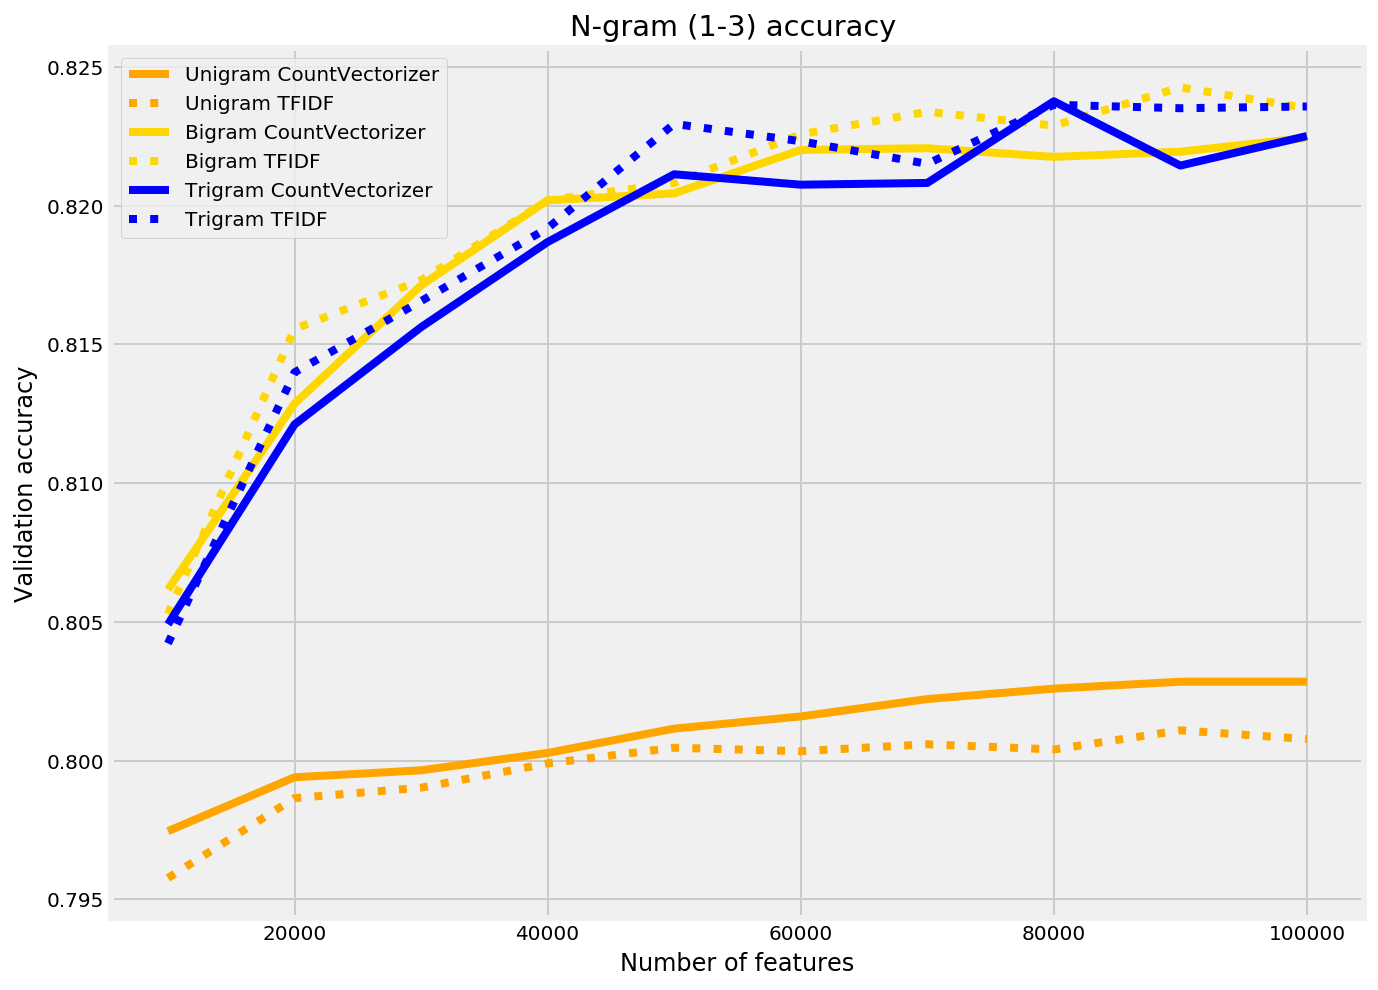

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(feature_plot_ug_c.nfeatures, feature_plot_ug_c.validation_accuracy, label='Unigram CountVectorizer', color='orange')
plt.plot(feature_plot_ug_t.nfeatures, feature_plot_ug_t.validation_accuracy, label='Unigram TFIDF', linestyle=':', color='orange')
plt.plot(feature_plot_bg_c.nfeatures, feature_plot_bg_c.validation_accuracy, label='Bigram CountVectorizer', color='gold')
plt.plot(feature_plot_bg_t.nfeatures, feature_plot_bg_t.validation_accuracy, label='Bigram TFIDF', linestyle=':', color='gold')
plt.plot(feature_plot_tg_c.nfeatures, feature_plot_tg_c.validation_accuracy, label='Trigram CountVectorizer', color='blue')
plt.plot(feature_plot_tg_t.nfeatures, feature_plot_tg_t.validation_accuracy, label='Trigram TFIDF', linestyle=':', color='blue')
plt.title('N-gram (1-3) accuracy ')
plt.xlabel('Number of features')
plt.ylabel('Validation accuracy')
plt.legend()

In [22]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [23]:
names = ['Ridge Classifier', 'Logistic Regression', 'Perceptron', 'Passive-Agressive Classifier', 'Stochastic Gradient Descent',
         'LinearSVC', 'L1 based LinearSVC', 'KNN', 'Nearest Centroid', 'Multinomial NB', 'Bernoulli NB', 'Adaboost']
classifiers = [
    RidgeClassifier(),
    LogisticRegression(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    SGDClassifier(),
    LinearSVC(),
    Pipeline([
        ('feature_selection', SelectFromModel(LinearSVC(penalty='l1', dual=False))),
        ('classification', LinearSVC(penalty='l2'))
    ]),
    KNeighborsClassifier(),
    NearestCentroid(),
    MultinomialNB(),
    BernoulliNB(),
    AdaBoostClassifier(),
]

In [24]:
zipped_clf = zip(names, classifiers)
tfidf = TfidfVectorizer()

In [25]:
def classifier_comparator(vectorizer = tfidf, n_features=10000, stop_words=None, ngram_range=(1,1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, ngram_range=ngram_range, max_features=n_features)
    for n, c in classifier:
        pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', c)])
        print('Validation result for {}'.format(n), c)
        clf_accuracy, ttime = accuracy_summary(pipeline, x_train, y_train, x_validation, y_validation)
        
        result.append((n, clf_accuracy, ttime))
    return result

In [26]:
bigram_comparison = classifier_comparator(n_features=90000, ngram_range=(1,2))

Validation result for Ridge Classifier RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)
Null accuracy: 50.18%
Accuracy: 82.27%
Model is 32.08% more accurate than null accuracy
Train and test time: 131.30s
--------------------------------------------------
Validation result for Logistic Regression LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.18%
Accuracy: 82.43%
Model is 32.24% more accurate than null accuracy
Train and test time: 148.35s
--------------------------------------------------
Validation result for Perceptron Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Null accuracy: 50.18%
Accuracy: 76.39%
Model is 26.20% more accurate than null accuracy
Train and test time: 86.75s
--------------------------------------------------
Validation result for Passive-Agressive Classifier PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Null accuracy: 50.18%
Accuracy: 82.33%
Model is 32.15% more accurate than null accuracy
Train and test time: 660.29s
--------------------------------------------------
Validation result for L1 based LinearSVC Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
         

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Null accuracy: 50.18%
Accuracy: 82.28%
Model is 32.10% more accurate than null accuracy
Train and test time: 1789.78s
--------------------------------------------------
Validation result for KNN KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Null accuracy: 50.18%
Accuracy: 62.55%
Model is 12.37% more accurate than null accuracy
Train and test time: 1774.94s
--------------------------------------------------
Validation result for Nearest Centroid NearestCentroid(metric='euclidean', shrink_threshold=None)
Null accuracy: 50.18%
Accuracy: 72.55%
Model is 22.36% more accurate than null accuracy
Train and test time: 82.94s
--------------------------------------------------
Validation result for Multinomial NB MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Null accuracy: 50.18%
Accuracy: 80.15%
Model is 29.97% more accurate than null accuracy


In [27]:
bigram_comparison

[('Ridge Classifier', 0.8226968121751111, 131.29689383506775),
 ('Logistic Regression', 0.8242625414918269, 148.34589409828186),
 ('Perceptron', 0.7638880190392685, 86.75481677055359),
 ('Passive-Agressive Classifier', 0.7966430763449615, 86.87511277198792),
 ('Stochastic Gradient Descent', 0.7871860712719985, 86.92221474647522),
 ('LinearSVC', 0.8233231039017974, 660.2899441719055),
 ('L1 based LinearSVC', 0.8228220705204484, 1789.7836332321167),
 ('KNN', 0.625540176614267, 1774.942220211029),
 ('Nearest Centroid', 0.7254963361933989, 82.94343066215515),
 ('Multinomial NB', 0.8015281518131145, 78.38130331039429),
 ('Bernoulli NB', 0.7991482432517066, 77.17731952667236),
 ('Adaboost', 0.7023235423060061, 570.5331428050995)]

In [29]:
labels = ['Classifier', 'Accuracy', 'Time']
df = pd.DataFrame(bigram_comparison, columns = labels)

In [31]:

df

,Classifier,Accuracy,Time
0,Ridge Classifier,0.822697,131.296894
1,Logistic Regression,0.824263,148.345894
2,Perceptron,0.763888,86.754817
3,Passive-Agressive Classifier,0.796643,86.875113
4,Stochastic Gradient Descent,0.787186,86.922215
5,LinearSVC,0.823323,660.289944
6,L1 based LinearSVC,0.822822,1789.783633
7,KNN,0.625540,1774.942220
8,Nearest Centroid,0.725496,82.943431
9,Multinomial NB,0.801528,78.381303


In [30]:
df.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy,Time
1,Logistic Regression,0.824263,148.345894
5,LinearSVC,0.823323,660.289944
6,L1 based LinearSVC,0.822822,1789.783633
0,Ridge Classifier,0.822697,131.296894
9,Multinomial NB,0.801528,78.381303
10,Bernoulli NB,0.799148,77.177320
3,Passive-Agressive Classifier,0.796643,86.875113
4,Stochastic Gradient Descent,0.787186,86.922215
2,Perceptron,0.763888,86.754817
8,Nearest Centroid,0.725496,82.943431


In [32]:
df.to_csv('result.csv')

In [33]:
d = pd.read_csv('result.csv')

NameError: name 'd' is not defined